### constructing model to prediction election outcomes. trying simple bayesian model to start off with. maybe try random forest next. how do these two models compare? can one use knn somehow?

need to think about the fact that this model will be hooked up to the interactive GUI frontend. What models benefit that setup?

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
pd.options.display.max_columns = 100

In [19]:
%matplotlib inline

### import and process data

In [3]:
file_results = "US_County_Level_Presidential_Results_08-16.csv"
file_demo = "data.csv"

In [36]:
df_results = pd.read_csv(file_results)
df_demo = pd.read_csv(file_demo)

In [5]:
df_results.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9336 entries, 0 to 9335
Data columns (total 7 columns):
fips_code    9336 non-null int64
county       9336 non-null object
Year         9336 non-null int64
total        9336 non-null int64
dem          9336 non-null int64
gop          9336 non-null int64
oth          9336 non-null int64
dtypes: int64(6), object(1)
memory usage: 510.6+ KB


In [6]:
df_results.head(10)

,fips_code,county,Year,total,dem,gop,oth
0,1001,Autauga County,2008,23641,6093,17403,145
1,1001,Autauga County,2012,23909,6354,17366,189
2,1001,Autauga County,2016,24661,5908,18110,643
3,1003,Baldwin County,2008,81413,19386,61271,756
4,1003,Baldwin County,2012,84988,18329,65772,887
5,1003,Baldwin County,2016,94090,18409,72780,2901
6,1005,Barbour County,2008,11630,5697,5866,67
7,1005,Barbour County,2012,11459,5873,5539,47
8,1005,Barbour County,2016,10390,4848,5431,111
9,1007,Bibb County,2008,8644,2299,6262,83


In [7]:
df_results.describe()

,fips_code,Year,total,dem,gop,oth
count,9336.000000,9336.000000,9.336000e+03,9.336000e+03,9336.000000,9336.000000
mean,30651.700514,2012.000000,4.085194e+04,2.062078e+04,19147.228685,1068.092224
std,14983.049587,3.266161,1.114610e+05,7.070693e+04,41969.558607,3529.889843
min,1001.000000,2008.000000,6.400000e+01,4.000000e+00,54.000000,0.000000
25%,19038.500000,2008.000000,4.849250e+03,1.474000e+03,2969.000000,89.000000
50%,29208.000000,2012.000000,1.089000e+04,3.824000e+03,6590.000000,231.000000
75%,46005.500000,2016.000000,2.837225e+04,1.101625e+04,16506.750000,682.500000
max,56045.000000,2016.000000,3.318248e+06,2.295853e+06,956425.000000,117058.000000


In [8]:
df_demo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3111 entries, 0 to 3110
Data columns (total 38 columns):
State                                3111 non-null object
FIPS                                 3111 non-null int64
County                               3111 non-null object
election_result                      3111 non-null object
% Some College                       3111 non-null float64
% Smokers                            3111 non-null int64
% Single-Parent Households           3111 non-null int64
% Severe Housing Problems            3111 non-null int64
% Receiving HbA1c                    3078 non-null float64
% Physically Inactive                3111 non-null int64
% Obese                              3111 non-null int64
% Long Commute - Drives Alone        3111 non-null int64
% LBW                                3022 non-null float64
% Fair/Poor                          3111 non-null int64
% Excessive Drinking                 3111 non-null int64
% Drive Alone - White        

In [9]:
df_demo.head(10)

,State,FIPS,County,election_result,% Some College,% Smokers,% Single-Parent Households,% Severe Housing Problems,% Receiving HbA1c,% Physically Inactive,% Obese,% Long Commute - Drives Alone,% LBW,% Fair/Poor,% Excessive Drinking,% Drive Alone - White,% Drive Alone - Hispanic,% Drive Alone - Black,% Drive Alone,% Children in Poverty - White,% Children in Poverty - Hispanic,% Children in Poverty - Black,% Children in Poverty,% Alcohol-Impaired,% Mammography,Graduation Rate,Income Ratio,Mentally Unhealthy Days,Physically Unhealthy Days,Preventable Hosp. Rate,Teen Birth Rate,Violent Crime Rate,Years of Potential Life Lost Rate,Chlamydia Rate,Association Rate,% unemployment,% Uninsured,% With Access
0,Alabama,1001,Autauga,Trump,59.7,17,25,15,84.0,29,34,43,9.0,18,15,83.0,NaN,NaN,87,11.0,NaN,43.0,19,33.0,62.7,90.0,4.3,4.2,4.2,59.0,32.0,266.0,9158.0,398.0,13.7,0.052712,11,71.0
1,Alabama,1003,Baldwin,Trump,62.9,18,27,15,83.0,22,27,38,9.0,16,15,85.0,61.0,85.0,85,14.0,12.0,50.0,20,34.0,66.0,85.0,4.5,4.0,3.7,48.0,38.0,217.0,7394.0,341.0,11.5,0.054153,16,72.0
2,Alabama,1005,Barbour,Trump,39.3,23,56,16,89.0,32,44,36,12.0,25,12,NaN,NaN,82.0,84,12.0,52.0,69.0,45,38.0,63.0,86.0,5.6,4.8,4.8,74.0,59.0,329.0,8573.0,613.0,8.2,0.086485,15,45.0
3,Alabama,1007,Bibb,Trump,50.2,20,30,14,82.0,34,40,47,12.0,20,14,88.0,NaN,NaN,83,18.0,NaN,61.0,29,33.0,61.3,85.0,4.3,4.4,4.4,77.0,47.0,147.0,11766.0,444.0,10.2,0.066371,14,33.0
4,Alabama,1009,Blount,Trump,51.2,21,27,12,88.0,28,35,60,7.0,19,14,82.0,73.0,NaN,85,21.0,57.0,20.0,22,20.0,59.6,91.0,4.0,4.5,4.5,63.0,43.0,212.0,9333.0,124.0,8.5,0.055209,16,26.0
5,Alabama,1011,Bullock,Clinton,33.6,23,73,18,86.0,32,43,47,13.0,28,11,74.0,NaN,79.0,75,NaN,NaN,46.0,51,62.0,60.0,88.0,6.0,4.6,5.0,76.0,78.0,302.0,10858.0,940.0,10.2,0.071711,17,23.0
6,Alabama,1013,Butler,Trump,43.3,22,52,16,81.0,34,36,33,11.0,27,11,87.0,NaN,87.0,84,19.0,NaN,57.0,36,37.0,62.4,83.0,4.9,5.0,5.2,86.0,56.0,523.0,12427.0,804.0,11.8,0.071288,14,46.0
7,Alabama,1015,Calhoun,Trump,54.0,20,40,15,81.0,31,32,30,9.0,22,15,87.0,85.0,87.0,85,21.0,40.0,59.0,31,22.0,56.9,92.0,4.9,4.7,4.9,71.0,45.0,574.0,10717.0,724.0,14.7,0.066974,14,59.0
8,Alabama,1017,Chambers,Trump,45.0,21,52,19,82.0,32,40,35,11.0,24,12,86.0,NaN,87.0,85,23.0,69.0,51.0,34,30.0,57.2,85.0,4.8,4.7,4.8,56.0,60.0,527.0,11410.0,826.0,18.5,0.055438,15,61.0
9,Alabama,1019,Cherokee,Trump,52.6,18,32,15,89.0,34,34,45,8.0,19,13,86.0,NaN,NaN,84,29.0,NaN,41.0,30,20.0,63.4,88.0,4.8,4.5,4.5,79.0,49.0,384.0,12534.0,366.0,10.0,0.052137,15,33.0


In [10]:
df_demo.describe()

,FIPS,% Some College,% Smokers,% Single-Parent Households,% Severe Housing Problems,% Receiving HbA1c,% Physically Inactive,% Obese,% Long Commute - Drives Alone,% LBW,% Fair/Poor,% Excessive Drinking,% Drive Alone - White,% Drive Alone - Hispanic,% Drive Alone - Black,% Drive Alone,% Children in Poverty - White,% Children in Poverty - Hispanic,% Children in Poverty - Black,% Children in Poverty,% Alcohol-Impaired,% Mammography,Graduation Rate,Income Ratio,Mentally Unhealthy Days,Physically Unhealthy Days,Preventable Hosp. Rate,Teen Birth Rate,Violent Crime Rate,Years of Potential Life Lost Rate,Chlamydia Rate,Association Rate,% unemployment,% Uninsured,% With Access
count,3111.000000,3111.000000,3111.000000,3111.000000,3111.000000,3078.000000,3111.000000,3111.000000,3111.000000,3022.000000,3111.000000,3111.000000,2999.000000,1231.000000,1146.000000,3111.000000,3040.000000,2112.000000,1468.000000,3111.000000,3096.000000,3021.000000,2657.000000,3110.000000,3111.000000,3111.000000,3032.000000,3008.000000,2956.000000,2940.000000,2963.000000,3111.000000,3111.000000,3111.000000,3039.000000
mean,30646.730633,56.743427,17.855995,32.606557,14.359691,84.743665,26.048859,31.054645,30.608486,8.142290,17.024751,16.563163,79.744248,70.202275,76.465969,79.400836,17.561184,35.102273,42.497275,23.329797,30.522287,60.587521,86.342115,4.525434,3.781389,3.913115,59.433707,39.402926,245.124493,8071.014966,356.904151,13.821729,0.052230,14.324333,59.409345
std,14984.498360,11.617666,3.505324,10.319594,4.448220,6.158210,5.198954,4.531019,11.996344,2.140297,4.808724,3.143990,7.103421,9.890154,9.447958,6.739268,8.425752,16.585422,17.346404,9.352470,15.637580,8.182833,8.184525,0.723963,0.570038,0.727296,23.115011,18.048043,189.928545,2413.442550,237.069230,7.017843,0.018150,5.104243,24.194671
min,1001.000000,5.300000,7.000000,0.000000,1.000000,23.000000,8.000000,12.000000,2.000000,3.000000,8.000000,8.000000,10.000000,9.000000,11.000000,6.000000,1.000000,1.000000,2.000000,3.000000,0.000000,26.100000,30.000000,2.700000,2.300000,2.200000,12.000000,4.000000,0.000000,2947.000000,37.000000,0.000000,0.017461,3.000000,0.000000
25%,19038.000000,48.700000,15.000000,26.000000,11.000000,83.000000,23.000000,28.000000,21.000000,7.000000,13.000000,14.000000,77.000000,65.000000,73.000000,77.000000,11.000000,23.000000,30.000000,16.000000,21.000000,55.600000,83.000000,4.000000,3.400000,3.400000,44.000000,26.000000,113.000000,6396.500000,203.000000,9.350000,0.039817,10.000000,43.000000
50%,29207.000000,56.700000,17.000000,32.000000,14.000000,86.000000,26.000000,31.000000,30.000000,8.000000,16.000000,17.000000,81.000000,72.000000,78.000000,81.000000,17.000000,33.000000,43.000000,22.000000,30.000000,60.800000,88.000000,4.400000,3.800000,3.900000,56.000000,38.000000,198.000000,7763.500000,293.000000,12.600000,0.049545,14.000000,62.000000
75%,46004.000000,65.000000,20.000000,38.000000,17.000000,88.000000,30.000000,34.000000,39.000000,9.000000,20.000000,19.000000,84.000000,77.000000,82.000000,84.000000,23.000000,44.000000,54.000000,29.000000,38.000000,66.300000,92.000000,4.900000,4.200000,4.400000,70.000000,51.000000,324.250000,9513.500000,448.000000,16.600000,0.061316,18.000000,77.000000
max,56045.000000,89.500000,41.000000,100.000000,39.000000,100.000000,41.000000,48.000000,77.000000,31.000000,42.000000,27.000000,94.000000,93.000000,98.000000,95.000000,64.000000,92.000000,98.000000,62.000000,100.000000,87.500000,100.000000,9.000000,5.800000,6.500000,231.000000,124.000000,1718.000000,28113.000000,2777.000000,68.700000,0.235211,35.000000,100.000000


### graph and examine data

In [17]:
df_results.select_dtypes(include=[np.number])

,fips_code,Year,total,dem,gop,oth
0,1001,2008,23641,6093,17403,145
1,1001,2012,23909,6354,17366,189
2,1001,2016,24661,5908,18110,643
3,1003,2008,81413,19386,61271,756
4,1003,2012,84988,18329,65772,887
5,1003,2016,94090,18409,72780,2901
6,1005,2008,11630,5697,5866,67
7,1005,2012,11459,5873,5539,47
8,1005,2016,10390,4848,5431,111
9,1007,2008,8644,2299,6262,83


In [29]:
df_results_scaled = df_results
#df_results_scaled.loc[:, 'total':] = df_results.loc[:, 'total':]/df_results.loc[:,'total']

In [37]:
data = df_results

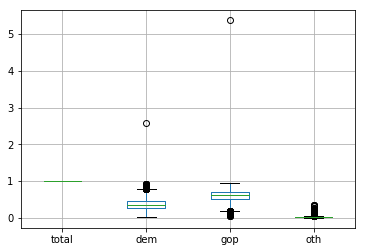

In [45]:
data.loc[:,'total':].div(data['total'], axis=0).boxplot()

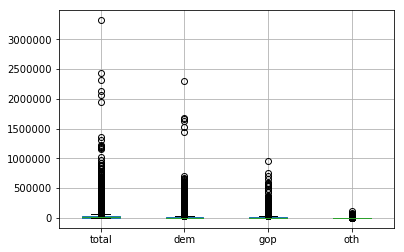

In [25]:
df_results.loc[:,'total':].boxplot()

### model data

#### national distribution

#### state distribution

#### poll distribution

### validate model. ppc. k-cross. what else?

### generate predictions and distribution of predictions. what is different from what is generated at this stage versus a frequentist model?